

#**Project: CUSTOMER CHURN ANALYSIS & REVENUE AT RISK ANALYSIS**

**Author:** NIKHIL GUPTA  

**Contact:** nikhilgupta2156ng@gmail.com

**Linkedin:** www.linkedin.com/in/nikhilgupta2156  

---




## Importing the necessary libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

import sqlite3 as sql

## Load the dataset

In [75]:
data = pd.read_csv('/content/data.csv')

Make a copy of the dataset for EDA

In [76]:
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Basic Structure of the data

Shape of the data

In [77]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 7043
Number of columns: 21


Data type of columns

In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
print(df.duplicated().any())

False


In [80]:
for col in df.columns:
  print(f'{col}:')
  print(df[col].unique())
  print('-'*50)

customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender:
['Female' 'Male']
--------------------------------------------------
SeniorCitizen:
[0 1]
--------------------------------------------------
Partner:
['Yes' 'No']
--------------------------------------------------
Dependents:
['No' 'Yes']
--------------------------------------------------
tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService:
['No' 'Yes']
--------------------------------------------------
MultipleLines:
['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService:
['DSL' 'Fiber optic' 'No']
--------------------------------------------------


Converting the columns into the correct data type for the analysis

In [81]:
df.MonthlyCharges = pd.to_numeric(df.MonthlyCharges, errors = 'coerce')
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Finding and handling NULL/Missing Values

In [82]:
print(df.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


In [83]:
df[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


###Total Charges with Null values all are having 0 tenure and are not the churn customers

In [84]:
df.drop(labels = df[df.TotalCharges.isnull()].index, axis = 0, inplace = True)
df.drop(labels = df[df.tenure == 0].index, axis = 0, inplace = True)
print(df.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


<Axes: >

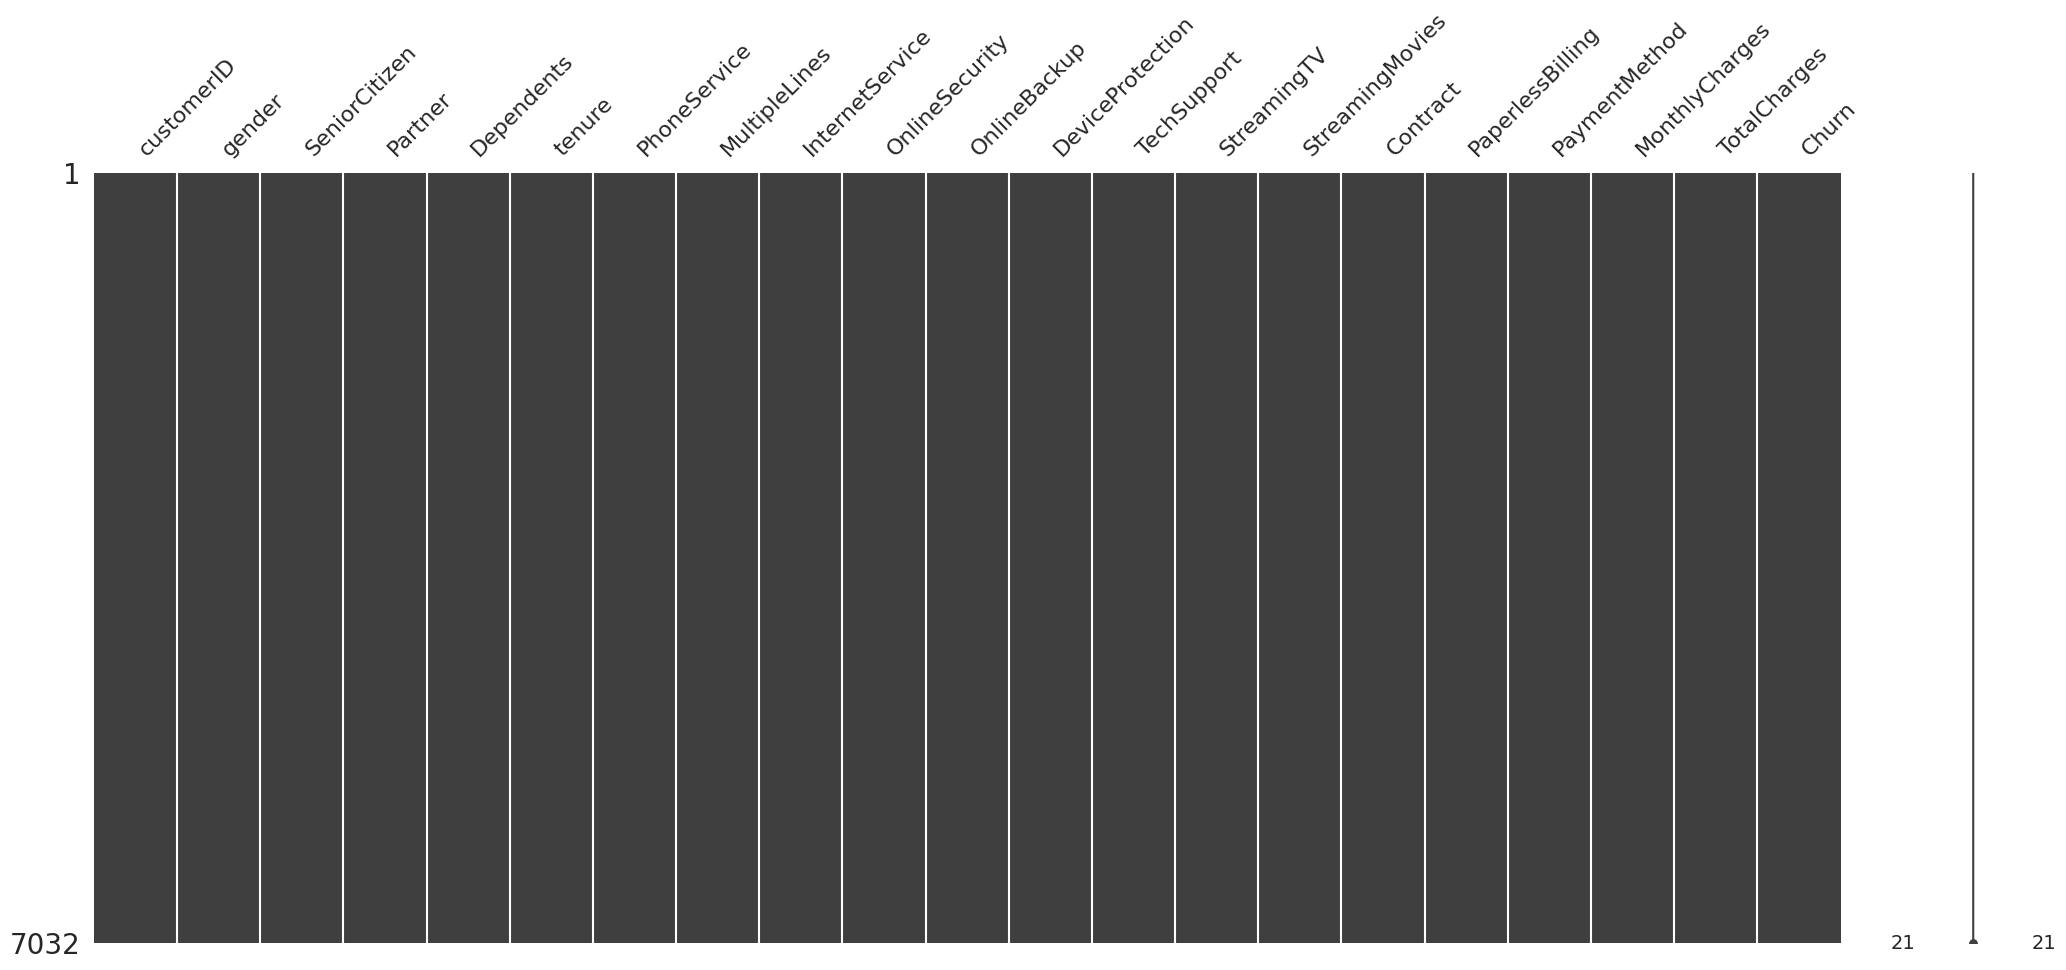

In [85]:
msno.matrix(df)

In [86]:
print(df.nunique())

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


In [87]:
df.PaymentMethod.value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


In [88]:
df.PaperlessBilling.value_counts()

,count
PaperlessBilling,
Yes,4168
No,2864


In [89]:
df.SeniorCitizen = df.SeniorCitizen.map({0:'No', 1:'Yes'})

In [90]:
print(df.SeniorCitizen.unique())

['No' 'Yes']


In [91]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


#Exploratory Data Analytics (EDA)

##Overall Churn Distribution

In [92]:
churn_values = df.Churn.value_counts()

In [93]:
fig = make_subplots(rows=1, cols=1)
fig.add_traces(go.Pie(labels = ['No','Yes'], values = churn_values, name = 'Churn',
                      hoverinfo = 'label+value+percent', title = dict(text = '<b>Churn<b>', font=dict(size=15)),
                      textfont_size = 15, textinfo = 'label+percent', marker = dict(colors = ['lightgrey','red'])))
fig.update_layout(showlegend = False, width=700, height=500,
                  title = dict(text = '<b>CHURN DISTRIBUTION<b>', x=0.5, font=dict(size=20)))
fig.show()

##Gender wise Churn Distribution

In [94]:
gender_churn_data = df.groupby(['gender','Churn']).size()
gender_churn_data = pd.DataFrame(gender_churn_data)
gender_churn_data.reset_index(inplace = True)
gender_churn_data.rename(columns = {0:'Count'}, inplace = True)
display(gender_churn_data)

fig = px.sunburst(
    gender_churn_data,
    path=['Churn','gender'],
    values='Count',
    title='<b>GENDER WISE CHURN DISTRIBUTION</b>',
    height=600, width=700, color = 'Churn',
    color_discrete_map = {'No':'lightgrey', 'Yes':'orange'}
)

fig.update_traces(texttemplate="%{label}<br>%{percentEntry:.1%}", hoverinfo = 'all', textfont_size = 15)
fig.show()

,gender,Churn,Count
0,Female,No,2544
1,Female,Yes,939
2,Male,No,2619
3,Male,Yes,930


##Churn Distribution based on Senior Citizen Status

In [95]:
fig = px.histogram(df, x = "Churn", color = 'SeniorCitizen',
             barmode = 'group',
             color_discrete_map={'No': 'lightgreen', 'Yes': 'tomato'},
             title = '<b>Churn Distrubution based on Senior Citizen Status<b>')
fig.update_layout(width = 1000, height = 500, bargap = 0.2)
fig.show()

##Churn Distribution based on Partner Status

In [96]:
fig = px.histogram(df, x = 'Churn', color = 'Partner',
             barmode = 'group',
             color_discrete_map={'No': 'lightblue', 'Yes': 'red'},
             title = '<b>Churn Distrubution based on Partner Status<b>')
fig.update_layout(width = 800, height = 400, bargap = 0.2)
fig.show()

##Churn Distribution based on Dependents Status

In [97]:
fig = px.histogram(df, x = "Churn", color = 'Dependents',
             barmode = 'group',
            #  color_discrete_map={'No': 'lightpink', 'Yes': 'red'},
             title = '<b>Churn Distrubution based on Dependents Status<b>')
fig.update_layout(width = 800, height = 400, bargap = 0.2)
fig.show()

##Churn Distribution based on Contrat type

In [98]:
fig = px.histogram(df, x = "Churn", color = 'Contract',
             barmode = 'group',
             title = '<b>Customer Contract based Churn Distrubution<b>')
fig.update_layout(width = 800, height = 500, bargap = 0.2)
fig.show()

##Churn Distribution based on ADD-ON Services (Phone Services, Online Seurity, Streaming, etc)

In [99]:
columns = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in columns:
  fig = px.histogram(df, x = 'gender', color = col, facet_col='Churn',
             barmode = 'group',
             title = f'<b>{col} based Churn Distrubution<b>')
  fig.update_layout(width = 800, height = 400, bargap = 0.2)
  fig.show()

###Insight -

These grphs show that there is very less behaviour in churn based on the gener. Both male and female are behaving similarly with respect to other aspets of the dataset.

##Payment method distribution

In [100]:
fig = px.pie(df, names = 'PaymentMethod', hole = 0.4, title = '<b>Payment Method Distribution<b>')
fig.update_layout(width = 700, height = 500)
fig.update_traces(textinfo="percent", textfont_size = 15)
fig.show()

In [101]:
fig = px.histogram(df, x = "Churn", color = 'PaymentMethod',
             barmode = 'group',
             title = '<b>Payment Method based Churn Distrubution<b>')
fig.update_layout(width = 800, height = 500, bargap = 0.2)
fig.show()

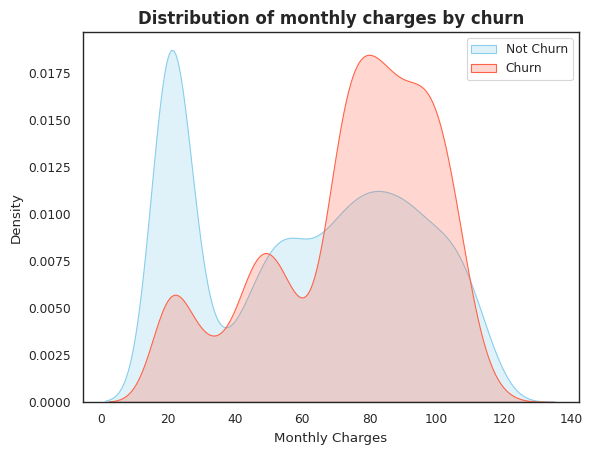

In [102]:
sns.set_context("paper")

ax = sns.kdeplot(df.MonthlyCharges[(df.Churn == 'No')], color="skyblue", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df.Churn == 'Yes')], ax =ax, color="tomato", shade= True);

ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn', size=12, fontweight = 'bold');

plt.show()

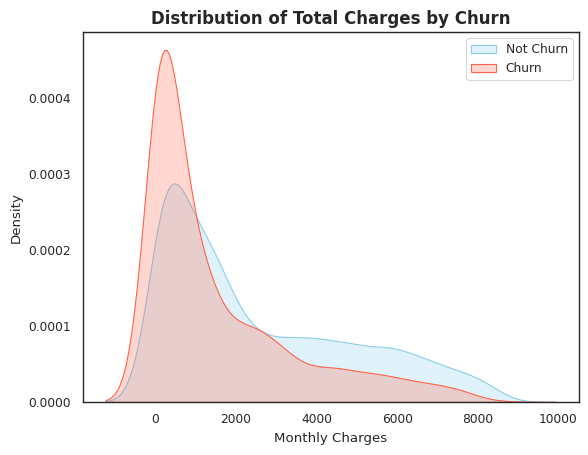

In [103]:
sns.set_context("paper")

ax = sns.kdeplot(df.TotalCharges[(df.Churn == 'No')], color="skyblue", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df.Churn == 'Yes')], ax =ax, color="tomato", shade= True);

ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of Total Charges by Churn', size=12, fontweight = 'bold');

plt.show()

tenure vs total charges

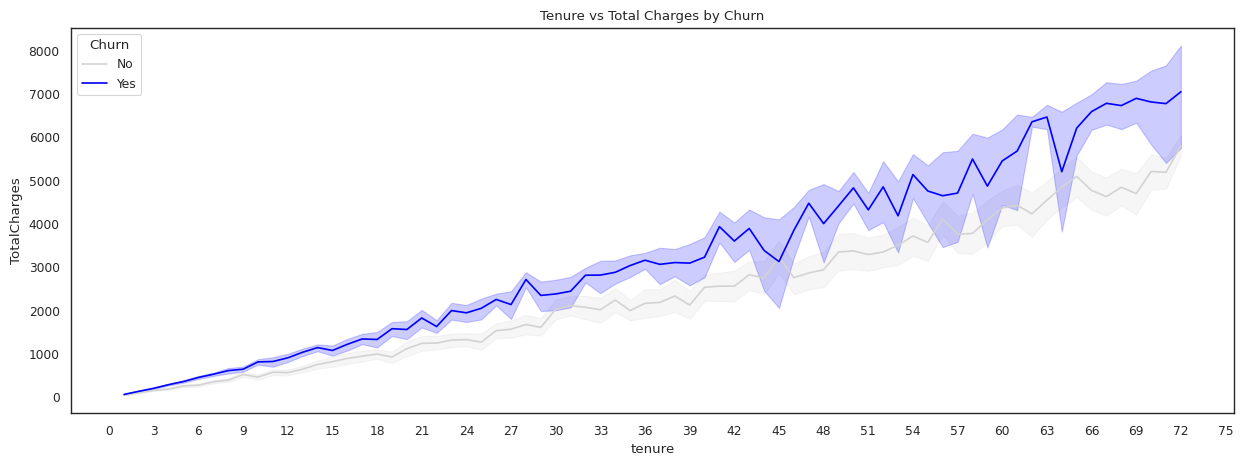

In [104]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='tenure', y='TotalCharges', hue='Churn', palette={'No': 'lightgrey', 'Yes': 'blue'})
plt.title('Tenure vs Total Charges by Churn')
plt.xticks(range(0,76,3))
plt.show()

tenure vs monthly charges

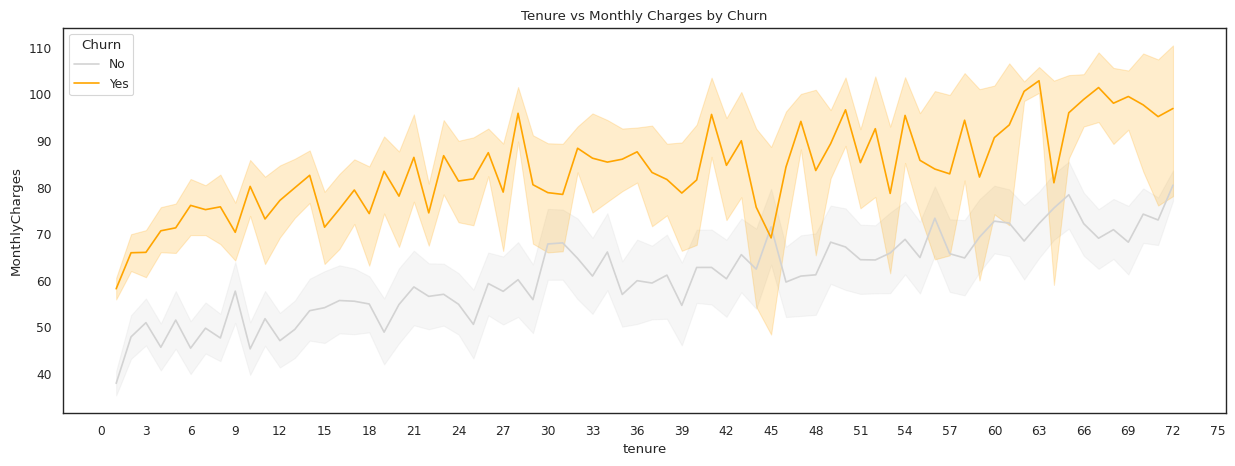

In [105]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette={'No': 'lightgrey', 'Yes': 'orange'})
plt.title('Tenure vs Monthly Charges by Churn')
plt.xticks(range(0,76,3))
plt.show()

In [106]:
fig = px.box(df, x='Churn', y='tenure', color='Churn', color_discrete_map={'No': 'skyblue', 'Yes': 'salmon'})
fig.update_layout(width=800, height=600, title_font=dict(size=25), title='<b>Tenure vs Churn</b>')
fig.update_yaxes(title_text='Tenure (Months)')
fig.show()

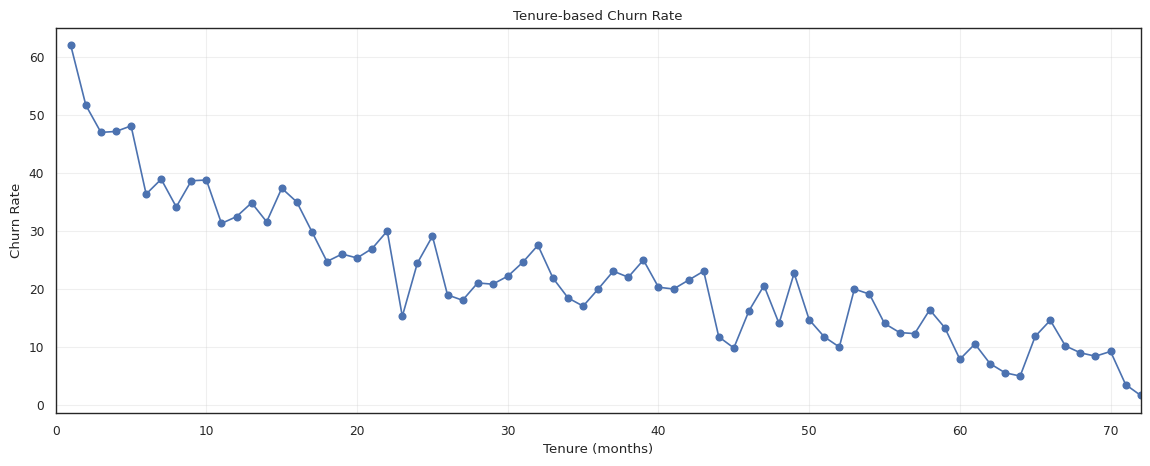

In [107]:
# churn rate per tenure month
tenure_churn = df.groupby('tenure').agg(total_customers = ('Churn','count'),churn_count = ('Churn', lambda x: (x=='Yes').sum())).reset_index()
tenure_churn
tenure_churn['churn_rate'] = round(tenure_churn['churn_count'] / tenure_churn['total_customers']*100,2)
tenure_churn

plt.figure(figsize=(14,5))
plt.plot(tenure_churn['tenure'], tenure_churn['churn_rate'], marker='o')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate')
plt.title('Tenure-based Churn Rate')
plt.grid(alpha=0.3)
plt.xlim(0,72)
plt.show()
# tenure_churn.head(10)

In [108]:
max_ideal_baseline = 25 #estimate
baseline = (df.Churn == 'Yes').mean()
print(f'baseline: {round(baseline*100,2)}%')

payment_churn = df.groupby('PaymentMethod').agg(total_customers = ('Churn','count'),
                                                churn_count = ('Churn', lambda x: (x=='Yes').sum())).reset_index()
print(payment_churn)

payment_churn['churn_rate'] = round(payment_churn['churn_count'] / payment_churn['total_customers']*100,2)
display(payment_churn)

baseline: 26.58%
               PaymentMethod  total_customers  churn_count
0  Bank transfer (automatic)             1542          258
1    Credit card (automatic)             1521          232
2           Electronic check             2365         1071
3               Mailed check             1604          308


,PaymentMethod,total_customers,churn_count,churn_rate
0,Bank transfer (automatic),1542,258,16.73
1,Credit card (automatic),1521,232,15.25
2,Electronic check,2365,1071,45.29
3,Mailed check,1604,308,19.20


In [109]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

company_baseline = (df.Churn == 'Yes').mean()*100
industry_baseline = 25

for col in cat_cols:
    # ---- 1. Prepare churn summary for the category ----
    temp = data.groupby(col).agg(
        total=('Churn', 'count'),
        churners=('Churn', lambda x: (x == 'Yes').sum())
    ).reset_index()

    temp['churn_rate'] = (temp['churners'] / temp['total']) * 100

    # ---- 2. Plot chart ----
    fig = px.bar(
        temp,
        x=col,
        y='churn_rate',
        title=f'Churn Rate by {col} w.r.t Baselines',
        labels={'churn_rate': 'Churn Rate (%)', col: col},
        height=400, width=850,
        text=temp['churn_rate'].apply(lambda v: f"{v:.2f}%")
    )

    # ---- 3. Add baselines (company + industry) ----
    fig.add_hline(y=company_baseline, line_dash="dash", line_color="orange")
    fig.add_hline(y=industry_baseline, line_dash="dash", line_color="black")

    # ---- 4. Add annotations for baselines ----
    # Company baseline
    fig.add_annotation(
        x=1,
        y=company_baseline,
        text=f"Company Avg = {company_baseline:.2f}%",
        showarrow=True,
        yanchor="bottom",
        arrowhead=2
    )

    # Industry baseline
    fig.add_annotation(
        x=2,
        y=industry_baseline,
        text=f"Industry Max = {industry_baseline:.2f}%",
        showarrow=True,
        yanchor="bottom",
        arrowhead=2
    )

    # ---- 5. Formatting ----
    fig.update_traces(textposition="outside")
    fig.update_layout(bargap=0.2)

    # ---- 6. Show chart for the category ----
    fig.show()

label encoding

In [110]:
df_2 = df.copy()

In [111]:
for col in df_2:
  df_2[col] = pd.factorize(df_2[col])[0]

In [112]:
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,1,0,1,...,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,3,0,0,0,1,...,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,4,4,1


In [113]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

heatmap


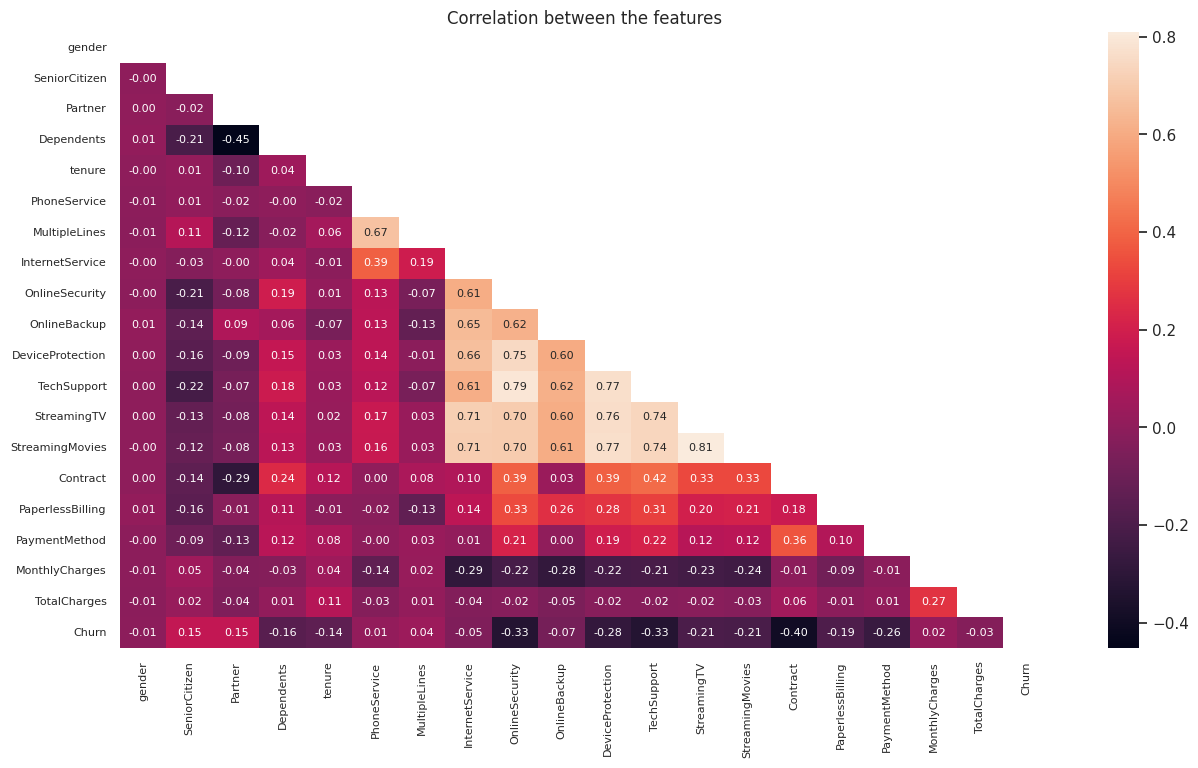

In [114]:
df_2 = df_2.drop(['customerID'], axis=1)
sns.set(style = 'white')
corr = df_2.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(figsize=(15,8))
sns.heatmap(corr, mask=mask, annot=True, fmt = '.2f', annot_kws=dict(fontsize=8))
plt.title('Correlation between the features')
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

# CUSTOMER PROFILING

#Customer Profile 1: Price-Sensitive Fiber Optic Users (High Bill Shock)
* Fiber optic internet

* Month-to-month contract

* High MonthlyCharges

* PaperlessBilling = Yes

* Tenure < 12 months

In [115]:
cp1 = df[(df.InternetService == 'Fiber optic') &
        (df.Contract == 'Month-to-month') &
        (df.MonthlyCharges > df.MonthlyCharges.median()) &
        (df.PaperlessBilling == 'Yes') &
        (df.tenure < 12)]
# display(p1.head())

cp1_churn = cp1[cp1.Churn == 'Yes'].shape[0]
print(f'Churn size of Customer Profile 1: {cp1_churn}')

cp1_churn_rate = round((cp1.Churn == 'Yes').mean()*100,2)
print(f'Customer Profile 1 Churn Rate: {cp1_churn_rate}')

cp1_lift = round(cp1_churn_rate / (baseline*100),2)
print(f'Customer Profile 1 Lift: {cp1_lift}x')

Churn size of Customer Profile 1: 431
Customer Profile 1 Churn Rate: 73.93
Customer Profile 1 Lift: 2.78x


#Custoer Profile 2: Low Engagement / No Add-ons
  No Online Security
  
  No Tech Support

  No Device Protection

  No Online backup

  No StreamingTVs

  No Streaming Movies

In [116]:
cp2 = df[
    (df.OnlineSecurity == 'No') &
    (df.TechSupport == 'No') &
    (df.DeviceProtection == 'No') &
    (df.OnlineBackup == 'No') &
    (df.StreamingTV == 'No') &
    (df.StreamingMovies == 'No')
]
cp2

cp2_churn = cp2[cp2.Churn == 'Yes'].shape[0]
print(f'Churn size of Customer Profile 2: {cp2_churn}')

cp2_churn_rate = round((cp2.Churn == 'Yes').mean()*100,2)
print(f'Customer Profile 2 Churn Rate: {cp2_churn_rate}')

cp2_lift = round(cp2_churn_rate / (baseline*100),2)
print(f'Customer Profile 2 Lift: {cp2_lift}x')

Churn size of Customer Profile 2: 362
Customer Profile 2 Churn Rate: 52.24
Customer Profile 2 Lift: 1.97x


#Customer Profie 3: Billing struggled users (Electronic Check Customers)

  Payment Method = Electronic Check

  Paperless Billing = Yes

  Cntract = Month to month

  No Tech Support

In [117]:
cp3 = df[
    (df.PaymentMethod == 'Electronic check') &
    (df.PaperlessBilling == 'Yes') &
    (df.Contract == 'Month-to-month') &
    (df.TechSupport == 'No')
]
cp3

cp3_churn = cp3[cp3.Churn == 'Yes'].shape[0]
print(f'Churn size of Customer Profile 3: {cp3_churn}')

cp3_churn_rate = round((cp3.Churn == 'Yes').mean()*100,2)
print(f'Customer Profile 3 Churn Rate: {cp3_churn_rate}')

cp3_lift = round(cp3_churn_rate / (baseline*100),2)
print(f'Customer Profile 3 Lift: {cp3_lift}x')

Churn size of Customer Profile 3: 718
Customer Profile 3 Churn Rate: 61.79
Customer Profile 3 Lift: 2.32x


#Customer profile 4: Senior Tech-Struggeled Users

  Senior Citizen

  No Tech Support

  No Onine Security

  Fiber Optic OR DSL Users


In [118]:
cp4 = df[
    (df.SeniorCitizen == 'Yes') &
    (df.TechSupport == 'No') &
    (df.OnlineSecurity == 'No') &
    ((df.InternetService == 'Fiber optic') | (df.InternetService == 'DSL'))
]
cp4

cp4_churn = cp4[cp4.Churn == 'Yes'].shape[0]
print(f'Churn size of Customer Profile 4: {cp4_churn}')

cp4_churn_rate = round((cp4.Churn == 'Yes').mean()*100,2)
print(f'Customer Profile 4 Churn Rate: {cp4_churn_rate}')

cp4_lift = round(cp4_churn_rate / (baseline*100),2)
print(f'Customer Profile 4 Lift: {cp4_lift}x')

Churn size of Customer Profile 4: 370
Customer Profile 4 Churn Rate: 55.14
Customer Profile 4 Lift: 2.07x


#Customer Profile 5: New Uers with No Support and High Bills

  Tenure is less than 6 months

  high Monthly Charges

  Paperless Billing

  No Online Security

  No Tech Support

In [119]:
cp5 = df[
    (df.tenure < 6) &
    (df.MonthlyCharges > df.MonthlyCharges.median()) &
    (df.PaperlessBilling == 'Yes') &
    (df.OnlineSecurity == 'No') &
    (df.TechSupport == 'No')
]
cp5

cp5_churn = cp5[cp5.Churn == 'Yes'].shape[0]
print(f'Churn size of Customer Profile 5: {cp5_churn}')

cp5_churn_rate = round((cp5.Churn == 'Yes').mean()*100,2)
print(f'Customer Profile 5 Churn Rate: {cp5_churn_rate}')

cp5_lift = round(cp5_churn_rate / (baseline*100),2)
print(f'Customer Profile 5 Lift: {cp5_lift}x')

Churn size of Customer Profile 5: 245
Customer Profile 5 Churn Rate: 82.21
Customer Profile 5 Lift: 3.09x


#Customer Profile 6: Single Independent Females digital users, low loyalty users

  Female users

  No Partner

  No Dependents

  Month to month Contract

  Electronic Check users

In [120]:
cp6 = df[
    (df.gender == 'Female') &
    (df.Partner == 'No') &
    (df.Dependents == 'No') &
    (df.Contract == 'Month-to-month') &
    (df.PaymentMethod == 'Electronic check')
]

cp6_churn = cp6[cp6.Churn == 'Yes'].shape[0]
print(f'Churn size of Customer Profile 6: {cp6_churn}')

cp6_churn_rate = round((cp6.Churn == 'Yes').mean()*100,2)
print(f'Customer Profile 6 Churn Rate: {cp6_churn_rate}')

cp6_lift = round(cp6_churn_rate / (baseline*100),2)
print(f'Customer Profile 6 Lift: {cp6_lift}x')

Churn size of Customer Profile 6: 329
Customer Profile 6 Churn Rate: 57.32
Customer Profile 6 Lift: 2.16x


#CUSTOMER PROFILE TABLE

In [121]:
cp_table = []

cp_table.append({
    'Customer Profile': 'CP 1',
    'Churn Size': cp1_churn,
    'Churn Rate (%)': cp1_churn_rate,
    'Lift': cp1_lift,
    'cp Size': len(cp1)
})
cp_table.append({
    'Customer Profile': 'CP 2',
    'Churn Size': cp2_churn,
    'Churn Rate (%)': cp2_churn_rate,
    'Lift': cp2_lift,
    'cp Size': len(cp2)
})
cp_table.append({
    'Customer Profile': 'CP 3',
    'Churn Size': cp3_churn,
    'Churn Rate (%)': cp3_churn_rate,
    'Lift': cp3_lift,
    'cp Size': len(cp3)
})
cp_table.append({
    'Customer Profile': 'CP 4',
    'Churn Size': cp4_churn,
    'Churn Rate (%)': cp4_churn_rate,
    'Lift': cp4_lift,
    'cp Size': len(cp4)
})
cp_table.append({
    'Customer Profile': 'CP 5',
    'Churn Size': cp5_churn,
    'Churn Rate (%)': cp5_churn_rate,
    'Lift': cp5_lift,
    'cp Size': len(cp5)
})
cp_table = pd.DataFrame(cp_table)
cp_table = cp_table.sort_values(by=['Churn Rate (%)','Lift'], ascending=False).reset_index(drop=True)
display(cp_table)

,Customer Profile,Churn Size,Churn Rate (%),Lift,cp Size
0,CP 5,245,82.21,3.09,298
1,CP 1,431,73.93,2.78,583
2,CP 3,718,61.79,2.32,1162
3,CP 4,370,55.14,2.07,671
4,CP 2,362,52.24,1.97,693


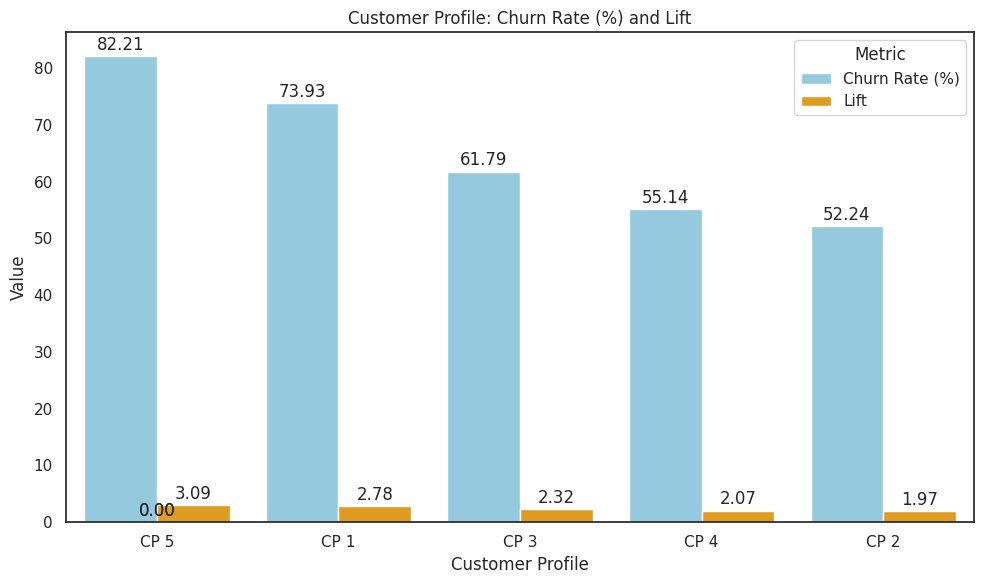

In [122]:
cp_table_melted = cp_table.melt(id_vars=['Customer Profile'], value_vars=['Churn Rate (%)', 'Lift'],
                                var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Customer Profile', y='Value', hue='Metric', data=cp_table_melted,
            palette={'Churn Rate (%)': 'skyblue', 'Lift': 'orange'})
plt.title('Customer Profile: Churn Rate (%) and Lift')
plt.ylabel('Value')
plt.xlabel('Customer Profile')
plt.legend(title='Metric')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 8),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [123]:
df.to_csv('telco.csv', index=False)

KPI's by using the SQL queries



In [124]:
db = sql.connect("telco.db")
df.to_sql("telco_churn", db, if_exists="replace", index=False)

7032

Overall Churn rate and Total Customers

In [125]:
q1 = '''
        with cte1 as (
        Select
          SUM(case when Churn = 'Yes' then 1 else 0 end)*1 as churn_count,
          count(Churn) as total_customers
        from telco_churn
        )
        Select
          *,
          round((churn_count*100/total_customers),2) as churn_rate
        From
          cte1;
        '''
df1 = pd.read_sql_query(q1, db)
df1

,churn_count,total_customers,churn_rate
0,1869,7032,26.0


Churn Rate based on Senior Citizen Status

In [126]:
q2 = '''
        with cte1 as (SELECT
            SeniorCitizen,
            CAST(SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS REAL) AS churn_count,
            COUNT(Churn) AS total_customers_count
        FROM
            telco_churn
        GROUP BY
            SeniorCitizen)

          SELECT *, round((churn_count / total_customers_count)*100,2) as churn_rate
          FROM cte1;

        '''
df2 = pd.read_sql_query(q2, db)
display(df2)

,SeniorCitizen,churn_count,total_customers_count,churn_rate
0,No,1393.0,5890,23.65
1,Yes,476.0,1142,41.68


Gender vs Churn

In [127]:
q3 = '''
        with cte1 as (SELECT
            gender,
            CAST(SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS REAL) AS churn_count,
            COUNT(Churn) AS total_customers_count
        FROM
            telco_churn
        GROUP BY
            gender)

          SELECT *, round((churn_count / total_customers_count)*100,2) as churn_rate
          FROM cte1;

        '''
df3 = pd.read_sql_query(q3, db)
display(df3)

,gender,churn_count,total_customers_count,churn_rate
0,Female,939.0,3483,26.96
1,Male,930.0,3549,26.20


Churn vs Partner & Dependents

In [128]:
q4 = '''
        with cte1 as (SELECT
            Partner, Dependents,
            (SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END)*1.0) AS churn_count,
            COUNT(Churn) AS total_customers_count
        FROM
            telco_churn
        GROUP BY
            Partner, Dependents)

          SELECT *, round((churn_count / total_customers_count)*100,2) as churn_rate
          FROM cte1;

        '''
df4 = pd.read_sql_query(q4, db)
display(df4)

,Partner,Dependents,churn_count,total_customers_count,churn_rate
0,No,No,1123.0,3280,34.24
1,No,Yes,77.0,359,21.45
2,Yes,No,420.0,1653,25.41
3,Yes,Yes,249.0,1740,14.31


Retention Analysis (tenure based)

In [129]:
q5 = '''
        with cte1 as (
          SELECT
          customerID,
          tenure,
          Churn
        FROM
          telco_churn
        ),
        cte2 as (
          SELECT
            customerID,
            Churn,
            CASE
              WHEN tenure BETWEEN 1 AND 3 THEN '1-3 months'
              WHEN tenure BETWEEN 4 AND 6 THEN '4-6 months'
              WHEN tenure BETWEEN 7 AND 12 THEN '7-12 months'
              WHEN tenure BETWEEN 13 AND 24 THEN '1-2 years'
              WHEN tenure BETWEEN 25 AND 48 THEN '2-4 years'
              ELSE '4+ years'
            END AS tenure_group
          FROM
            cte1
        )
        SELECT
          tenure_group,
          ROUND((SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END)*1.0) / (COUNT(*)) *100, 2) as churn_rate
        FROM
          cte2
        GROUP BY
          tenure_group
        ORDER BY
          churn_rate DESC;
        '''
df5 = pd.read_sql_query(q5, db)
display(df5)

fig = px.bar(df5, x='tenure_group', y='churn_rate',
             title='Churn Rate by Tenure Group',
             labels={'churn_rate': 'Churn Rate (%)', 'tenure_group': 'Tenure Group'})
fig.update_traces(marker_color='red')
fig.update_layout(width = 700, height=500)
fig.show()

,tenure_group,churn_rate
0,1-3 months,56.80
1,4-6 months,44.63
2,7-12 months,35.89
3,1-2 years,28.71
4,2-4 years,20.39
5,4+ years,9.51


Churn vs Phone Service and Multiple Lines

In [130]:
q6 = '''
        with cte1 as (SELECT
            PhoneService, MultipleLines,
            CAST(SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS REAL) AS churn_count,
            COUNT(Churn) AS total_customers_count
        FROM
            telco_churn
        GROUP BY
            PhoneService, MultipleLines
        )
          SELECT *, round((churn_count / total_customers_count)*100,2) as churn_rate
          FROM cte1;

        '''
df6 = pd.read_sql_query(q6, db)
display(df6)

,PhoneService,MultipleLines,churn_count,total_customers_count,churn_rate
0,No,No phone service,170.0,680,25.00
1,Yes,No,849.0,3385,25.08
2,Yes,Yes,850.0,2967,28.65


Churn vs Internet service

In [131]:
q7 = '''
        with cte1 as (SELECT
            InternetService,
            (SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END)*1.0) AS churn_count,
            COUNT(Churn) AS total_customers_count
        FROM
            telco_churn
        GROUP BY
            InternetService)

          SELECT *, round((churn_count / total_customers_count)*100,2) as churn_rate
          FROM cte1;

        '''
df7 = pd.read_sql_query(q7, db)
display(df7)

,InternetService,churn_count,total_customers_count,churn_rate
0,DSL,459.0,2416,19.00
1,Fiber optic,1297.0,3096,41.89
2,No,113.0,1520,7.43


Churn VS Add-on Services and Tech Support

In [132]:
q8 = '''
        SELECT
          OnlineSecurity,
          OnlineBackup,
          DeviceProtection,
          TechSupport,
          COUNT(*) as total_customers,
          ROUND(AVG(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END)*100.0, 2) as churn_rate
        FROM
          telco_churn
        GROUP BY
          OnlineSecurity,
          OnlineBackup,
          DeviceProtection,
          TechSupport
        ORDER BY
          churn_rate DESC;
        '''
df8 = pd.read_sql_query(q8, db)
display(df8)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,total_customers,churn_rate
0,No,No,No,No,1267,56.67
1,No,No,Yes,No,446,46.41
2,No,Yes,No,No,471,41.61
3,No,Yes,Yes,No,369,34.96
4,No,No,No,Yes,242,30.99
5,Yes,No,No,No,308,29.87
6,No,No,Yes,Yes,240,23.75
7,Yes,Yes,No,No,214,19.63
8,No,Yes,No,Yes,207,19.32
9,Yes,No,Yes,No,175,18.29


Churn vs Loyalty

In [133]:
q9 = '''
        WITH cte1 AS
        (
          SELECT
            customerID,
            Churn,
            CASE
              WHEN tenure BETWEEN 1 AND 12 THEN 'New'
              WHEN tenure BETWEEN 13 AND 36 THEN 'Medium'
              ELSE 'Loyal'
            END AS loyalty_status
          from
            telco_churn
        )
        SELECT
          loyalty_status,
          (SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END)*1.0) as churn_count,
          COUNT(*) as total_customers,
          ROUND(AVG(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END)*100.0,2) as churn_rate
        FROM
          cte1
        GROUP BY
          loyalty_status
        ORDER BY
          churn_rate DESC;
        '''
df9 = pd.read_sql_query(q9, db)
display(df9)

# First chart: Churn Rate by Loyalty Status
fig1 = px.bar(df9, x='loyalty_status', y='churn_rate',
             labels={'churn_rate': 'Churn Rate (%)', 'loyalty_status': 'Loyalty Status'},
             color='loyalty_status', color_discrete_map={'New': 'salmon', 'Medium': 'orange', 'Loyal': 'lightgreen'})

# Melt the DataFrame to prepare for grouped bar chart
df9_melted = df9.melt(id_vars=['loyalty_status'], value_vars=['total_customers', 'churn_count'],
                               var_name='Metric', value_name='Value')

# Second chart: Total Customers and Churn Count by Loyalty Status
fig2 = px.bar(df9_melted, x='loyalty_status', y='Value', color='Metric', barmode='group',
             labels={'Value': 'Count', 'loyalty_status': 'Loyalty Status'},
             color_discrete_map={'total_customers': 'skyblue', 'churn_count': 'salmon'})

# Create subplots
fig_combined = make_subplots(rows=1, cols=2,
                             subplot_titles=('Churn Rate by Loyalty Status', 'Total Customers and Churn Count by Loyalty Status'))

# Add traces from the first chart to the first subplot
for trace in fig1.data:
    fig_combined.add_trace(trace, row=1, col=1)

# Add traces from the second chart to the second subplot
for trace in fig2.data:
    fig_combined.add_trace(trace, row=1, col=2)

# Update layout for combined figure
fig_combined.update_layout(height=500, width=1000, title_text='<b>Loyalty Status Analysis</b>')

# Update y-axis titles for each subplot if needed (Plotly Express usually handles this for individual plots)
fig_combined.update_yaxes(title_text='Churn Rate (%)', row=1, col=1)
fig_combined.update_yaxes(title_text='Count', row=1, col=2)

fig_combined.show()


,loyalty_status,churn_count,total_customers,churn_rate
0,New,1037.0,2175,47.68
1,Medium,474.0,1856,25.54
2,Loyal,358.0,3001,11.93


Churn vs Paperless Billing

In [134]:
q10 = '''
        with cte1 as (SELECT
            PaperlessBilling,
            (SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END)*1.0) AS churn_count,
            COUNT(Churn) AS total_customers_count
        FROM
            telco_churn
        GROUP BY
            PaperlessBilling)

          SELECT *, round((churn_count / total_customers_count)*100,2) as churn_rate
          FROM cte1;

        '''
df10 = pd.read_sql_query(q10, db)
display(df10)

,PaperlessBilling,churn_count,total_customers_count,churn_rate
0,No,469.0,2864,16.38
1,Yes,1400.0,4168,33.59


Churn vs Payment Method

In [135]:
q11 = '''
        with cte1 as (SELECT
            PaymentMethod,
            (SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END)*1.0) AS churn_count,
            COUNT(Churn) AS total_customers_count
        FROM
            telco_churn
        GROUP BY
            PaymentMethod)

          SELECT *, round((churn_count / total_customers_count)*100,2) as churn_rate
          FROM cte1;

        '''
df11 = pd.read_sql_query(q11, db)
display(df11)

,PaymentMethod,churn_count,total_customers_count,churn_rate
0,Bank transfer (automatic),258.0,1542,16.73
1,Credit card (automatic),232.0,1521,15.25
2,Electronic check,1071.0,2365,45.29
3,Mailed check,308.0,1604,19.20


##Monthly Charges Comparison (Churn vs Non-Churn)

In [136]:
q12 = '''
        SELECT
          ROUND(AVG(MonthlyCharges),2) AS overall_avg,
          ROUND(AVG(CASE WHEN Churn='Yes' THEN MonthlyCharges END),2) AS avg_churned,
          ROUND(AVG(CASE WHEN Churn='No' THEN MonthlyCharges END),2) AS avg_not_churned
        FROM
          telco_churn;
        '''
df12 = pd.read_sql_query(q12, db)

display(df12)
df12 = df12.T.reset_index()
df12.columns = ['Category', 'MonthlyCharges']

fig = px.bar(df12, x='Category', y='MonthlyCharges',
             title='Monthly Charges Comparison',
             labels={'MonthlyCharges': 'Average Monthly Charges ($)'},
             color='Category',
             color_discrete_map={
                 'Overall Average': 'skyblue',
                 'Average Churned': 'salmon',
                 'Average Not Churned': 'lightgreen'
             })
fig.update_layout(width=700, height=500)
fig.show()

,overall_avg,avg_churned,avg_not_churned
0,64.8,74.44,61.31


##Total Charges Comparison (Churn vs Non-Churn)


In [137]:
q13 = '''
        SELECT
          ROUND(AVG(TotalCharges),2) AS overall_avg,
          ROUND(AVG(CASE WHEN Churn='Yes' THEN TotalCharges END),2) AS avg_churned,
          ROUND(AVG(CASE WHEN Churn='No' THEN TotalCharges END),2) AS avg_not_churned
        FROM
          telco_churn;
        '''
df13 = pd.read_sql_query(q13, db)

df13 = df13.T.reset_index()
df13.columns = ['Category', 'TotalCharges']
display(df13)

fig = px.bar(df13, x='Category', y='TotalCharges',
             title='Total Charges Comparison',
             labels={'TotalCharges': 'Average Total Charges ($)'},
             color='Category',
             color_discrete_map={
                 'Overall Average': 'skyblue',
                 'Average Churned': 'salmon',
                 'Average Not Churned': 'lightgreen'
             })
fig.update_layout(width=700, height=500)
fig.show()

,Category,TotalCharges
0,overall_avg,2283.30
1,avg_churned,1531.80
2,avg_not_churned,2555.34


##Churn vs Contract

In [138]:
q14 = '''
        with cte1 as (SELECT
            Contract,
            (SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END)*1.0) AS churn_count,
            COUNT(Churn) AS total_customers_count
        FROM
            telco_churn
        GROUP BY
            Contract)

          SELECT *, round((churn_count / total_customers_count)*100,2) as churn_rate
          FROM cte1;
        '''
df14 = pd.read_sql_query(q14, db)
display(df14)

,Contract,churn_count,total_customers_count,churn_rate
0,Month-to-month,1655.0,3875,42.71
1,One year,166.0,1472,11.28
2,Two year,48.0,1685,2.85


##Aerage Tenure of Customers(Churn vs Non Churn)

In [139]:
q15 = '''
        SELECT
          Churn,
          ROUND(AVG(tenure),2) AS avg_tenure
        FROM
          telco_churn
        GROUP BY
          Churn;
        '''
df15 = pd.read_sql_query(q15, db)
display(df15)

,Churn,avg_tenure
0,No,37.65
1,Yes,17.98


#CUSTOMER LIFETIME VALUE (CLV) - estimation

In [140]:
q16 = '''
        with avg_tenure as (
          SELECT
          avg(tenure) as avg_tenure
        from
          telco_churn
        ),

        monthly_churn_rate as (
          SELECT
          1/avg(tenure) as monthly_churn_rate
        from
          telco_churn
        )

        Select
          customerID,
          tenure,
          MonthlyCharges,
          round((MonthlyCharges *(tenure + (1/monthly_churn_rate))),2) as CLV
        from
          telco_churn,
          monthly_churn_rate
        order by
          CLV desc;

        '''
df16 = pd.read_sql_query(q16, db)
display(df16)

,customerID,tenure,MonthlyCharges,CLV
0,7569-NMZYQ,72,118.75,12400.09
1,9924-JPRMC,72,118.20,12342.66
2,2889-FPWRM,72,117.80,12300.89
3,3810-DVDQQ,72,117.60,12280.00
4,8984-HPEMB,71,118.65,12270.99
...,...,...,...,...
7027,1423-BMPBQ,1,19.00,635.01
7028,9975-SKRNR,1,18.90,631.67
7029,8992-CEUEN,1,18.85,630.00
7030,9318-NKNFC,1,18.85,630.00


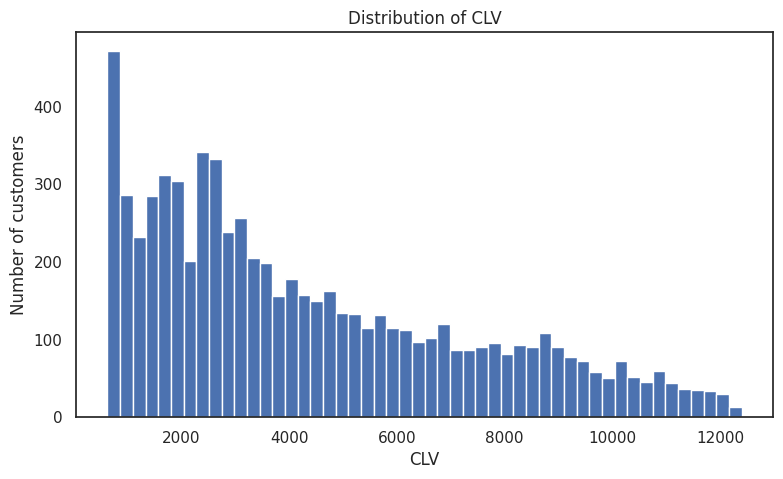

In [141]:
# Histogram of CLV
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.hist(df16['CLV'].dropna(), bins=50)
plt.title('Distribution of CLV')
plt.xlabel('CLV')
plt.ylabel('Number of customers')
plt.show()


#REVENUE AT RISK ANALYSIS

In [142]:
q17 = '''
          WITH churn_param AS (
            SELECT
              SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) * 1.0 AS total_churned,
              COUNT(*) * 1.0 AS total_customers,
              AVG(Tenure) * 1.0 AS avg_tenure,
              SUM(MonthlyCharges) * 1.0 AS total_monthly_revenue
            FROM telco_churn
          ),
          monthly_churn AS (
            SELECT
              1.0 / avg_tenure AS mcr_by_avg_tenure,
              total_churned, total_customers, avg_tenure, total_monthly_revenue
            FROM churn_param
          )
          SELECT
            ROUND(SUM(CASE WHEN Churn='Yes' THEN MonthlyCharges ELSE 0 END), 2) AS historical_monthly_revenue_lost,
            ROUND(SUM(MonthlyCharges), 2) AS current_total_monthly_revenue,
            ROUND( SUM(CASE WHEN Churn='Yes' THEN MonthlyCharges ELSE 0 END) / SUM(MonthlyCharges) * 100, 2) AS pct_of_total_revenue_lost
          FROM telco_churn;


        '''
df17 = pd.read_sql_query(q17, db)
display(df17)

,historical_monthly_revenue_lost,current_total_monthly_revenue,pct_of_total_revenue_lost
0,139130.85,455661.0,30.53


##Expected Revenue at Risk

In [143]:
q17 = '''
          WITH churn_param AS (
            SELECT
              SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) * 1.0 AS total_churned,
              COUNT(*) * 1.0 AS total_customers,
              AVG(Tenure) * 1.0 AS avg_tenure,
              SUM(MonthlyCharges) * 1.0 AS total_monthly_revenue
            FROM
              telco_churn
          ),

          monthly_churn AS (
            SELECT
              1.0 / avg_tenure AS mcr, total_monthly_revenue
            FROM
              churn_param
          )

          SELECT
            ROUND(SUM(CASE WHEN Churn='No' THEN MonthlyCharges ELSE 0 END) * m.mcr, 2) AS exp_mnth_rev_at_risk,
            ROUND(m.total_monthly_revenue, 2) AS total_monthly_rev,
            ROUND((SUM(CASE WHEN Churn='No' THEN MonthlyCharges ELSE 0 END) * m.mcr) / m.total_monthly_revenue * 100, 2) AS pct
          FROM
            telco_churn t
          CROSS JOIN monthly_churn AS m;

        '''
df17 = pd.read_sql_query(q17, db)
display(df17)

,exp_mnth_rev_at_risk,total_monthly_rev,pct
0,9762.88,455661.0,2.14


# **Conclusion & Key Takeaways**

This project provided an end-to-end analysis of customer churn using **Python**, **SQL**, and strong analytical techniques. By exploring customer behavior, billing patterns, service usage, and contract types, the analysis highlights **why customers leave**, **which segments are most at risk**, and **how churn impacts business revenue**.

---

## **What We Achieved**

* Performed **comprehensive exploratory data analysis** on 7,000+ customer records.
* Built **customer segmentation** with 6 high-risk profiles (40%–82% churn rate).
* Calculated important **churn KPIs** including Churn Rate, CLV, Tenure Patterns, ARPU, and Revenue at Risk.
* Conducted **SQL-based revenue risk modeling** using CTEs.
* Estimated **~30% of monthly revenue at risk** from churn-prone groups.
* Visualized churn patterns across demographics, services, billing, and contract types.

---

## **Business Insights**

* **Month-to-month contract customers churn 3× more** than long-term contract users.
* **Lack of Tech Support increases churn by ~45%.**
* **High MonthlyCharges customers** are significantly more churn-prone.
* **Electronic Check** and **Paper Billing** customers show elevated churn.
* **Low-tenure customers (<6 months)** are at highest risk of early churn.

These insights can help businesses **design targeted retention strategies** such as discounts, priority support, contract incentives, and early engagement programs.

---

## **Impact for Stakeholders**

This churn analysis provides:

* Clear visibility into **churn behavior and customer risk**
* Identification of **high-value customers** who require retention attention
* A **data-driven basis** for reducing churn and protecting revenue
* Segmented customer intelligence that can guide marketing, support, and product teams

---

## **Next Steps / Future Work**

* Build a **Machine Learning churn prediction model** (Logistic Regression, Random Forest, XGBoost)
* Deploy a **Streamlit web app** for real-time churn scoring
* Build **Power BI / Tableau dashboards** for stakeholder reporting
* Implement automated **revenue-risk alerts** and monitoring scripts
* Explore **pricing optimization** for high-churn service plans

---

## **Thank You!**

Thank you for reviewing this analysis.
This project showcases my ability to:

* Work with real-world datasets
* Apply SQL + Python for analytics
* Generate meaningful business insights
* Communicate findings clearly with visualizations

If you’d like to connect or discuss this project further, feel free to reach out!

**Email:** nikhilgupta2156ng@gmail.com

**LinkedIn:** https://www.linkedin.com/in/nikhilgupta2156/